In [351]:
#49. Perform an EDA of hosp_details using YDATA Profiling.

#https://www.datacamp.com/tutorial/pandas-profiling-ydata-profiling-in-python-guide
pip install -U ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport
# Load your data
data = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='OPO_HospDetails') 

# Generate the profile report
profile = ProfileReport(data)

 #Display the report in the notebook
profile.to_notebook_iframe()

SyntaxError: invalid syntax (1388285433.py, line 4)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [137]:
#In how many cases were the relatives approached for consent vs how many were authorized?



In [145]:
#Which OPO recorded the lowest calculated deaths in any year?
import pandas as pd
data1 = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='Yearly_Outcomes') 
data1

min_value_in_column_mean_calc_deaths = data1['mean calc deaths'].min()
row_with_min_value = data1.loc[data1['mean calc deaths'].idxmin()]
print(row_with_min_value,min_value_in_column_mean_calc_deaths)

OPO                    OPO3
Year                   2016
mean calc deaths    656.265
Name: 25, dtype: object 656.265


In [38]:
#Plot the Density Chart for Cause of Death- Seizure against any other variable of your choice

#Cause of Death- Seizure vs gender

import seaborn as sns

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
DonorDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='DonorDetails') 
sns.kdeplot(DonorDetails.loc[(DonorDetails['causeofdeath']=='Seizure'),
            'age'], color='r', fill=True, label='Seizure')

plt.xlabel('age')
plt.ylabel('Probability Density')
plt.title('KDE Plot - Seizure vs age')
plt.legend()
plt.show()

In [40]:
#Display a correlation matrix showing count of donors in age group vs cause of death

import pandas as pd
DonorDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='DonorDetails') 


bins = [0, 20, 40,  60,  80,  100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
DonorDetails['Age Group'] = pd.cut(DonorDetails['age'], bins=bins, labels=labels, right=False)
DonorDetails['Age Group'].value_counts().sort_index()
age_group_counts = DonorDetails['Age Group'].value_counts()
#sns.scatterplot(x=age_group_counts, y='causeofdeath',data=DonorDetails)

#pivot_table = DonorDetails.pivot_table(index='Age Group', columns='causeofdeath', aggfunc='size', fill_value=0, observed=False)
#pivot_table
#correlation_matrix = pivot_table.corr()
#correlation_matrix 

#grouped = DonorDetails.groupby('causeofdeath').agg({'Age Group': 'value_counts'})
#grouped
#DonorDetails.groupby('causeofdeath')[['age']].corr()
#corr=(DonorDetails['Age Group']).corr(DonorDetails['causeofdeath'])
#df2=df.corr()
#plt.show()
#corr

pivot_table = DonorDetails.pivot_table(index='causeofdeath', columns='age_group_counts', values='age_group_counts')
# Create the heatmap
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')

KeyError: 'age_group_counts'

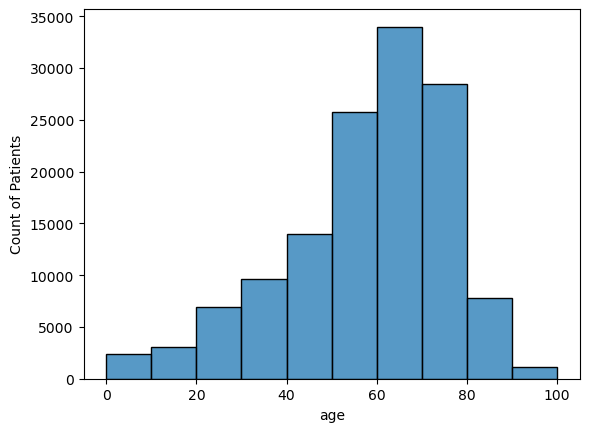

In [292]:
##Plot a graph to show the distribution of age

import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
DonorDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='DonorDetails') 

sns.histplot(x='age',data=DonorDetails,bins=10) 
plt.xlabel('age')
plt.ylabel('Count of Patients')
plt.show()

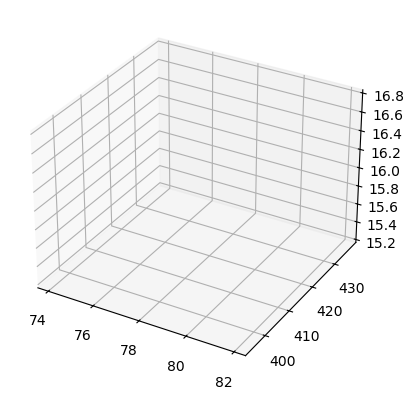

In [240]:
#Plot a 3-D graph using any set of random values chosen by you

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
ax = plt.axes(projection = "3d") #sets up a 3D plotting environment

x = np.random.randint(100)
y = np.random.randint(500)
z = np.random.randint(30)

ax.plot3D(x,y,z,'navy')

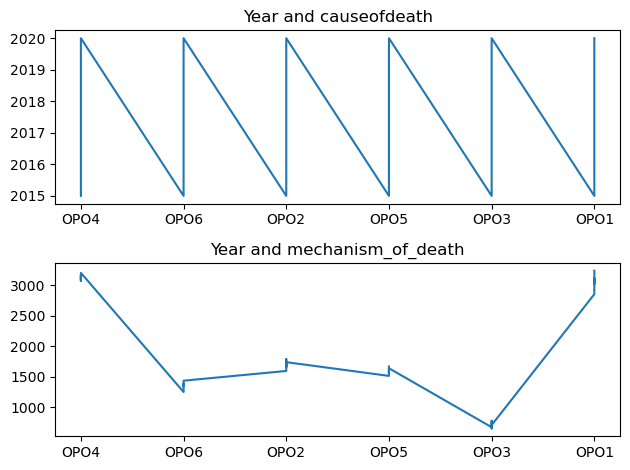

In [244]:
#Plot a graph by multiplotting on the same canvas (Take any set of x & y values)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create some data
Yearly_Outcomes =  pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='Yearly_Outcomes') 
x=Yearly_Outcomes['OPO']
y=Yearly_Outcomes['Year']
z=Yearly_Outcomes['mean calc deaths']

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1) 

# Plot the first subplot
axs[0].plot(x, y)
axs[0].set_title('Year and causeofdeath')

# Plot the second subplot
axs[1].plot(x, z)
axs[1].set_title('Year and mechanism_of_death')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
#Replace all null values in 'Procured_year' to 1900

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create some data
ReferralDetails =  pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='ReferralDetails') 
ReferralDetails.info()

ReferralDetails.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133101 entries, 0 to 133100
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   PatientID             133101 non-null  object        
 1   Approached Relatives  133101 non-null  int64         
 2   Authorized By Family  133101 non-null  int64         
 3   Cross_Clamped         133101 non-null  int64         
 4   transplanted          133101 non-null  int64         
 5   Tissue_Referral       133101 non-null  int64         
 6   Eye_Referral          133101 non-null  int64         
 7   time_referred         133101 non-null  datetime64[ns]
 8   time_approached       22147 non-null   datetime64[ns]
 9   time_authorized       19884 non-null   datetime64[ns]
 10  time_procured         9543 non-null    datetime64[ns]
 11  Referral_DayofWeek    133101 non-null  object        
 12  Referral_Year         133101 non-null  int64         
 13 

PatientID                    0
Approached Relatives         0
Authorized By Family         0
Cross_Clamped                0
transplanted                 0
Tissue_Referral              0
Eye_Referral                 0
time_referred                0
time_approached         110954
time_authorized         113217
time_procured           123558
Referral_DayofWeek           0
Referral_Year                0
Procured_Year           123558
dtype: int64

In [54]:
ReferralDetails.head(3)

,PatientID,Approached Relatives,Authorized By Family,Cross_Clamped,transplanted,Tissue_Referral,Eye_Referral,time_referred,time_approached,time_authorized,time_procured,Referral_DayofWeek,Referral_Year,Procured_Year
0,OPO1_P320866,0,0,0,0,1,1,2033-06-21 06:49:25.000,NaT,NaT,NaT,Tuesday,2018,1900.0
1,OPO1_P549364,0,0,0,0,1,1,2036-11-21 08:41:13.397,NaT,NaT,NaT,Sunday,2021,1900.0
2,OPO1_P536997,1,0,0,0,1,1,2030-08-23 23:28:54.687,NaT,NaT,NaT,Friday,2015,1900.0


In [52]:
ReferralDetails['Procured_Year'] = ReferralDetails['Procured_Year'].fillna(1900)

In [56]:
ReferralDetails.head(3)

,PatientID,Approached Relatives,Authorized By Family,Cross_Clamped,transplanted,Tissue_Referral,Eye_Referral,time_referred,time_approached,time_authorized,time_procured,Referral_DayofWeek,Referral_Year,Procured_Year
0,OPO1_P320866,0,0,0,0,1,1,2033-06-21 06:49:25.000,NaT,NaT,NaT,Tuesday,2018,1900.0
1,OPO1_P549364,0,0,0,0,1,1,2036-11-21 08:41:13.397,NaT,NaT,NaT,Sunday,2021,1900.0
2,OPO1_P536997,1,0,0,0,1,1,2030-08-23 23:28:54.687,NaT,NaT,NaT,Friday,2015,1900.0


In [85]:
#Display a donut chart of race and explode the wedge with the maximum patients

import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
DonorDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='DonorDetails') 

merged = DonorDetails.groupby(['race'])['PatientID'].count()
a=merged['race']
print(a)

#mycolors=['DarkKhaki','DarkOliveGreen','DarkGrey','Khaki']
#pie['PatientID'].plot(kind='pie',labels= pie['race'],autopct='%1.1f%%',startangle=90,colors=mycolors)



KeyError: 'race'

In [ ]:
#Who was the youngest white donor registered?

DonorDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='DonorDetails') 
DonorDetails_white = DonorDetails[DonorDetails['race'] == "White" ]
younger = DonorDetails_white['age'].min()
DonorDetails_white_younger=DonorDetails_white[DonorDetails_white['age'] == younger]
DonorDetails_white_younger

In [193]:
#What % of the dataset is male vs female?
DonorDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='DonorDetails') 
#DonorDetails_value_Counts = (DonorDetails['gender'].value_counts()/DonorDetails['gender'].sum()) * 100

DonorDetails_value_Counts = DonorDetails['gender'].value_counts()
#DonorDetails['gender'].value_counts().plot(kind='bar', title='% of the dataset is male vs female', color='orange')
DonorDetails_value_Sum=DonorDetails['PatientID'].count()
DonorDetails_value_Sum
DonorDetails_value_Counts
DonorDetails_value_percentage = (DonorDetails_value_Counts/DonorDetails_value_Sum)*100
DonorDetails_value_percentage




gender
M    58.805719
F    41.148451
Name: count, dtype: float64

In [204]:
#Display all records where approached time is more than 2 days after referral time

ReferralDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='ReferralDetails') 
ReferralDetails['Diff']=ReferralDetails['time_approached'].dt.day - ReferralDetails['time_referred'].dt.day 
ReferralDetails[(ReferralDetails['Diff']> 2.0)]

,PatientID,Approached Relatives,Authorized By Family,Cross_Clamped,transplanted,Tissue_Referral,Eye_Referral,time_referred,time_approached,time_authorized,time_procured,Referral_DayofWeek,Referral_Year,Procured_Year,Diff
123,OPO1_P420462,1,1,1,1,1,1,2036-12-27 10:28:23.860,2036-12-30 16:11:00,2036-12-30 16:11:00,2037-01-01 14:41:00,Saturday,2020,2020.0,3.0
398,OPO1_P869343,1,1,0,0,1,1,2034-03-05 19:38:12.997,2034-03-08 11:00:00,NaT,NaT,Saturday,2019,NaN,3.0
420,OPO1_P698255,1,1,0,0,1,1,2033-10-01 23:44:58.297,2033-10-10 15:17:00,2033-10-10 15:17:00,NaT,Sunday,2020,NaN,9.0
502,OPO1_P476522,1,1,1,1,1,1,2032-01-24 14:32:00.000,2032-01-28 15:15:00,2032-01-28 15:15:00,2032-01-30 19:42:00,Thursday,2016,2016.0,4.0
650,OPO1_P939152,1,1,0,0,1,1,2032-12-03 12:55:17.110,2032-12-11 18:47:00,2032-12-11 18:47:00,NaT,Monday,2019,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132750,OPO6_P944820,1,1,0,0,1,1,2031-02-08 22:34:00.000,2031-02-11 00:45:00,2031-02-11 00:45:00,NaT,Tuesday,2015,NaN,3.0
132849,OPO6_P10911,1,1,1,1,1,1,2033-07-02 22:38:00.000,2033-07-18 16:30:00,2033-07-18 16:30:00,2033-07-19 15:55:00,Saturday,2018,2018.0,16.0
132930,OPO6_P332293,1,1,1,1,1,1,2033-11-13 17:18:00.000,2033-11-17 22:40:00,2033-11-17 22:40:00,2033-11-18 21:14:00,Sunday,2018,2018.0,4.0
132974,OPO6_P313521,1,1,1,1,1,1,2035-07-24 03:48:00.000,2035-07-27 13:00:00,2035-07-27 14:20:00,2035-07-28 14:36:00,Wednesday,2020,2020.0,3.0


In [213]:
#How many patients of each race are listed under an Unknown cause of death?

DonorDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='DonorDetails') 
DonorDetails_unknown = DonorDetails[(DonorDetails['causeofdeath']=='Unknown')]
DonorDetails_unknown.groupby(['race'])['PatientID'].count()

race
Black        4970
Hispanic     4181
Other        1635
White       15994
Name: PatientID, dtype: int64

In [230]:
# In how many cases were the relatives approached for consent vs how many were authorized?

ReferralDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='ReferralDetails') 
ReferralDetails_Approached=ReferralDetails[(ReferralDetails['Approached Relatives']==1)]
cases_Approached = len(ReferralDetails_Approached)
ReferralDetails_Authorized=ReferralDetails[(ReferralDetails['Authorized By Family']==1)]
cases_Authorized = len(ReferralDetails_Authorized)
print("Cases were the relatives approached for consent is " + str(cases_Approached))
print("Cases were the family Authorized for consent is " + str(cases_Authorized))

Cases were the relatives approached for consent is 19551
Cases were the family Authorized for consent is 11989


In [280]:
# what is the average time difference between brain death and time_approached
ReferralDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='ReferralDetails') 
DonorDetails = pd.read_excel("OrganDonor_Consolidated.xlsx", sheet_name='DonorDetails') 
Merge = DonorDetails[["PatientID",
                      "time_brain_death"]].merge(ReferralDetails[["PatientID",
                                                                  "time_approached"]],
                                                 on = "PatientID",
                                                 how="left")
#Merge.to_excel("Merged.xlsx", index = False) 
Merge['Diff']=Merge['time_approached'].dt.day - Merge['time_brain_death'].dt.day
Merge['Diff'].notnull().mean()

print("The average time difference between brain death and time_approached (in days) is " + str(Merge['Diff'].notnull().mean()))


The average time difference between brain death and time_approached (in days) is 0.07587471168511131
